# Generating Distribution Functions

NumPy provides efficient and flexible tools for random sampling. Earlier versions of numpy (< v1.17) uses `numpy.random` methods directly (e.g. `numpy.random.normal`); users of newer versions are recommended to use the `Generator` instance with `default_rng` and call the various methods on it to obtain samples from different distributions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(10, 3)})
# For reproducibility
seed = 1234
rng = np.random.default_rng(seed)

## One-dimensional Distributions

### Discrete distribution

In the simplest case, if we have a discrete distribution (a set of values with associated probabilities), we can sample points like the following:

In [2]:
population = [1, 2, 3, 4, 5]
probabilities = [0.1, 0.2, 0.3, 0.25, 0.15]

samples = rng.choice(population, size=500, p=probabilities)
df_discrete = pd.DataFrame(samples, columns=["x"])

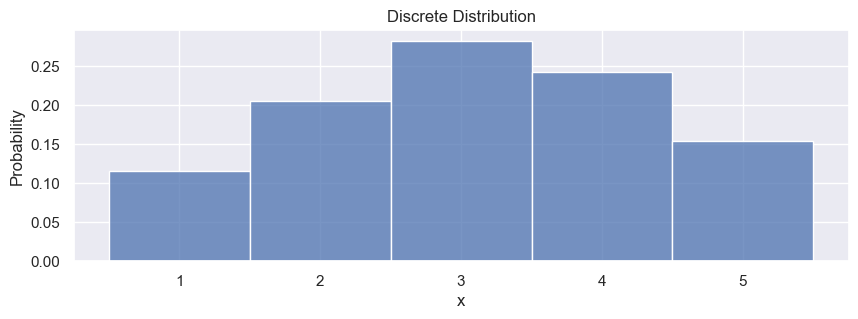

In [3]:
hp = sns.histplot(df_discrete,
                  x="x",
                  stat="probability",
                  discrete=True
                 )
hp.set(title="Discrete Distribution");

### Summation of two Maxwellian distributions

In [4]:
mean1, std1 = -2, 2
mean2, std2 = 4, 1
n1 = 9000
n2 = 1000

samples1 = rng.normal(mean1, std1, size=n1)
samples2 = rng.normal(mean2, std2, size=n2)
samples = np.concatenate([samples1, samples2])
np.random.shuffle(samples) # Shuffle to mix the samples randomly
df_double_peak = pd.DataFrame(samples, columns=["x"])

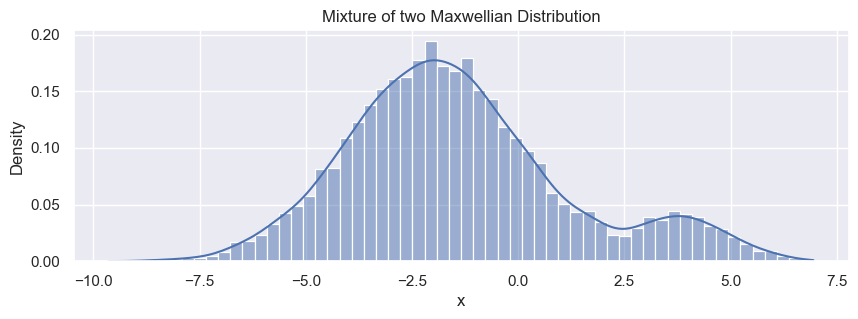

In [5]:
hp = sns.histplot(df_double_peak,
                  x="x",
                  stat="density",
                  kde=True
                 )
hp.set(title="Mixture of two Maxwellian Distribution");

## Two-dimensional Distributions

### 2D Maxwellian

In [6]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]
n1 = 5000

samples = rng.multivariate_normal(mean, cov, size=n1)
df_double_peak_2d = pd.DataFrame(samples, columns=["x", "y"])

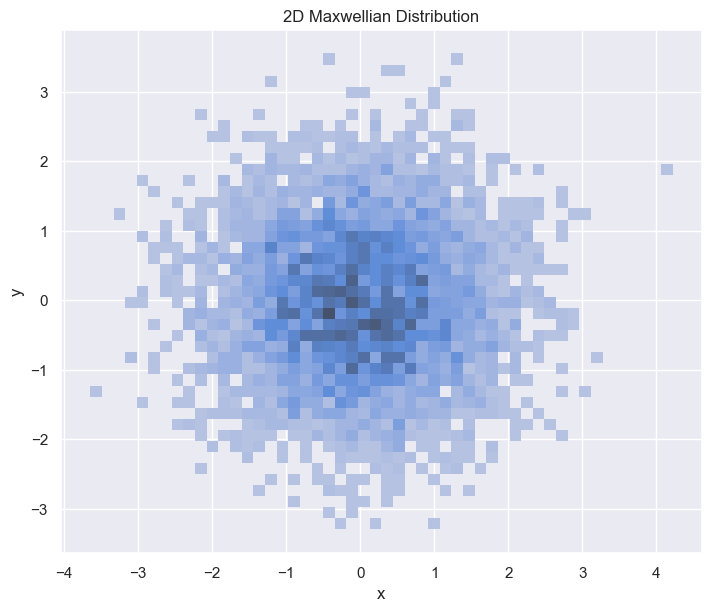

In [7]:
fig, ax = plt.subplots(figsize=(7, 6), layout="constrained")
hp = sns.histplot(df_double_peak_2d,
                  x="x", y="y",
                  stat="density",
                  ax=ax,
                 )
hp.set(title="2D Maxwellian Distribution");

### 2D double-peak Maxwellian

Here is an analytical construction of a mixture of two Maxwellian distribution in 2D. Note that the kernel density estimation in high dimension is an expensive operation.

In [8]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]
n1 = 8000
samples1 = rng.multivariate_normal(mean, cov, size=n1)

mean = [3, 3]
cov = [[1, 0], [0, 1]]
n2 = 2000
samples2 = rng.multivariate_normal(mean, cov, size=n2)

samples = np.concatenate((samples1, samples2))
df_double_peak_2d = pd.DataFrame(samples, columns=["x", "y"])
df_double_peak_2d

,x,y
0,0.078959,1.658682
1,-0.744014,0.577285
2,-0.024803,-0.416522
3,0.406430,0.313443
4,-1.095699,0.600776
...,...,...
9995,2.413522,3.084689
9996,3.634853,1.926545
9997,3.566450,2.187166
9998,5.832372,3.938116


<Axes: title={'center': '2D Double Peak Distribution'}, xlabel='x', ylabel='y'>

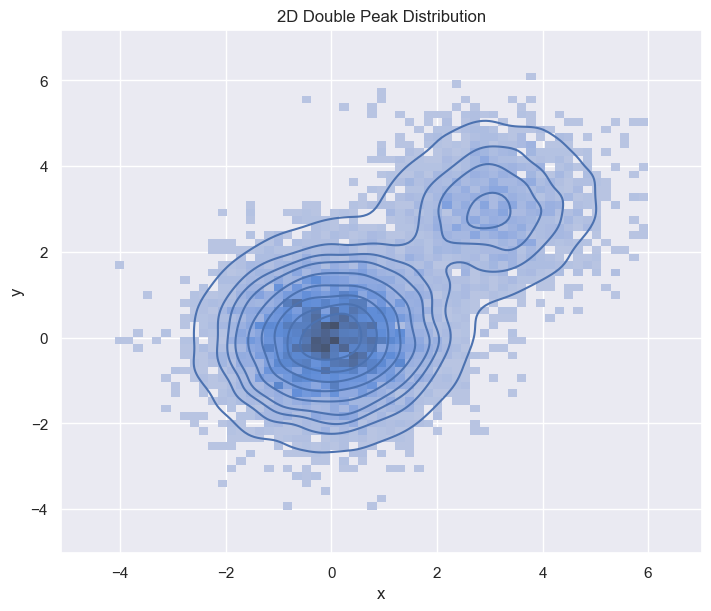

In [9]:
fig, ax = plt.subplots(figsize=(7, 6), layout="constrained")
hp = sns.histplot(df_double_peak_2d,
                  x="x", y="y",
                  stat="density",
                  ax=ax
                 )
hp.set(title="2D Double Peak Distribution");
sns.kdeplot(df_double_peak_2d, x="x", y="y")

## Generating Pseudo-Data from VDFpy

In `VDFpy`, we provide a utility function `make_clusters` for generating pseudo-data for testing the clustering algorithms. For instance, to generate 10 samples of one-dimensional VDFs from 2 clusters: 

In [10]:
from vdfpy.generator import make_clusters

df = make_clusters(n_clusters=2, n_dims=1, n_points=1000, n_samples=10)

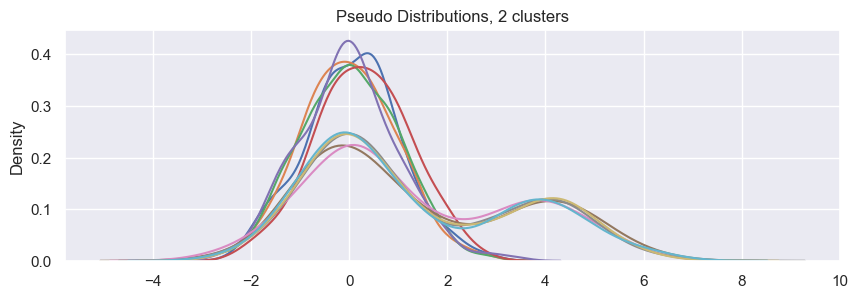

In [15]:
hp = sns.kdeplot(df["particle velocity"][0])
[sns.kdeplot(d,) for d in df["particle velocity"][1:]]
hp.set(title="Pseudo distributions, 2 clusters");